# Setup

## Install library

In [1]:
!pip install sastrawi
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=1927788a40d008e668517a4e7059bd7178cf218d25904889c3d1bf38da571314
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


## Import library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import swifter
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import shutil
from google.colab import drive, files

# Load Dataset & Exploratory Data Analysis

## Import dataset from GitHub

In [3]:
df = pd.read_json("https://raw.githubusercontent.com/tantowjy/news-classification/main/dataset/talas/dataset-training-talas-100.json")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 132
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    133 non-null    object
 1   link                     133 non-null    object
 2   date                     133 non-null    object
 3   content                  133 non-null    object
 4   liberalism_conservative  133 non-null    int64 
 5   coalition_opposition     133 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.3+ KB


,title,link,date,content,liberalism_conservative,coalition_opposition
0,Wapres Harap Bendungan Cipanas Berkembang Jadi...,https://nasional.kompas.com/read/2024/07/09/20...,2024-07-09,Wakil Presiden (Wapres) RI Ma'ruf Amin berhara...,0,1
1,Mahasiswa Dikhawatirkan Terlilit Utang Jika Ba...,https://nasional.kompas.com/read/2024/07/09/20...,2024-07-09,Gagasan Menteri Koordinator Pembangunan Manusi...,1,0
2,Airlangga Nilai KPU Masih Layak Selenggarakan ...,https://nasional.kompas.com/read/2024/07/09/20...,2024-07-09,Ketua Umum Partai Golkar Airlangga Hartarto me...,0,1
3,Pakar Ragu Rencana Datangkan Dokter Asing Bisa...,https://nasional.kompas.com/read/2024/07/09/19...,2024-07-09,Rencana pemerintah mendatangkan dokter asing u...,1,0
4,Usul Muhadjir Pakai Pinjol Buat Bayar Uang Kul...,https://nasional.kompas.com/read/2024/07/09/19...,2024-07-09,Usul Menteri Koordinator Pembangunan Manusia d...,1,0
...,...,...,...,...,...,...
128,BSSN Sempat Peringatakan Kominfo Sebelum PDN D...,https://nasional.tempo.co/read/1885966/bssn-se...,"Senin, 1 Juli 2024 08:48 WIB",Badan Siber dan Sandi Negara sudah mengirimkan...,1,0
129,Hasto Ungkap Alasan PDIP Gandeng Gerindra dan ...,https://nasional.tempo.co/read/1885956/hasto-u...,"Senin, 1 Juli 2024 08:29 WIB",Sekretaris Jenderal Partai Demokrasi Indonesia...,1,1
130,Projo NTB Duga Terkait dengan Pemberantasan Ju...,https://nasional.tempo.co/read/1885944/menkomi...,"Senin, 1 Juli 2024 07:41 WIB",Menteri Komunikasi dan Informatika (Menkominfo...,0,1
131,Amnesty International Indonesia Desak Pemerint...,https://nasional.tempo.co/read/1885933/amnesty...,"Senin, 1 Juli 2024 06:46 WIB",Direktur Eksekutif Amnesty Internasional Indon...,1,0


In [ ]:
files.download("dataset-final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Class distribution

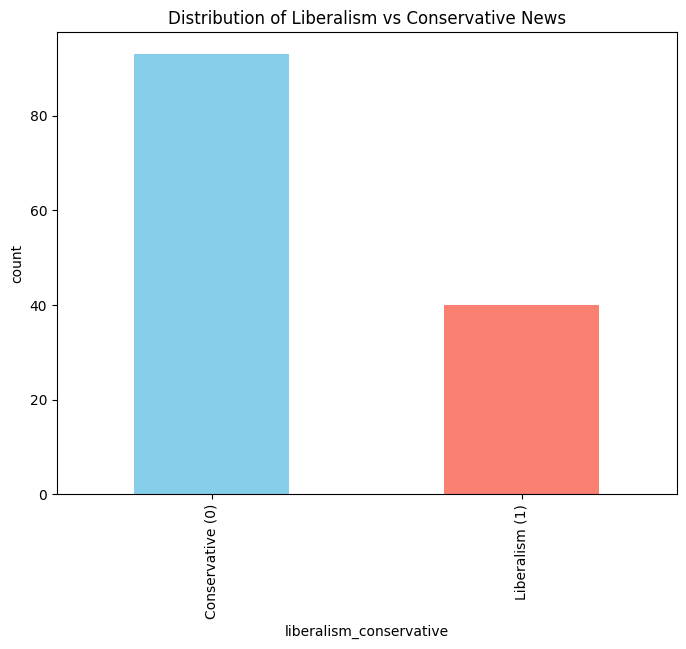

In [4]:
# count the occurrences of each class in 'is_fake'
count_classes = df['liberalism_conservative'].value_counts()

# plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
count_classes.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Liberalism vs Conservative News')
plt.xlabel('liberalism_conservative')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['Conservative (0)', 'Liberalism (1)'])
plt.show()

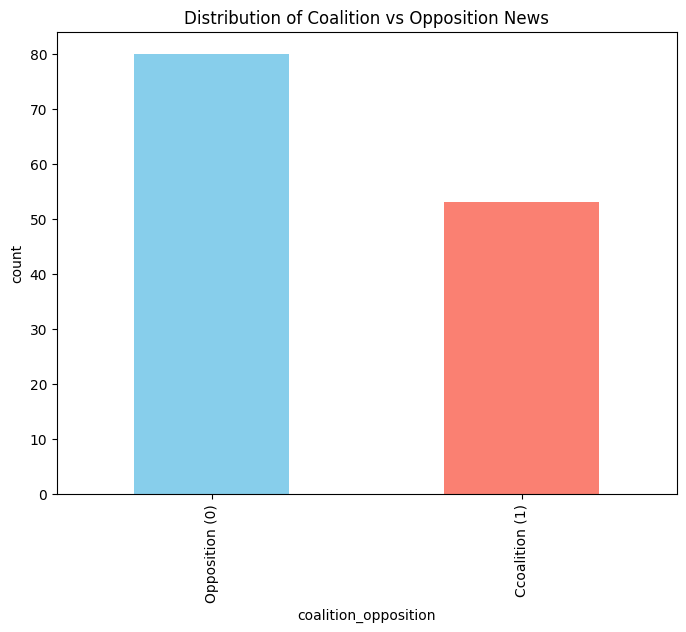

In [5]:
# count the occurrences of each class in 'is_fake'
count_classes = df['coalition_opposition'].value_counts()

# plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
count_classes.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Coalition vs Opposition News')
plt.xlabel('coalition_opposition')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['Opposition (0)', 'Ccoalition (1)'])
plt.show()

### Missing values

In [6]:
df.isna().sum()

title                      0
link                       0
date                       0
content                    0
liberalism_conservative    0
coalition_opposition       0
dtype: int64

### Median and mean word count


In [7]:
# add a column for the word count
df['text'] = df['title'] + ' ' + df['content']
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# calculate the median word count for each label
median_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].median()
median_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].median()

median_word_count_label_0, median_word_count_label_1

(324.0, 363.5)

In [8]:
# calculate the median word count for each label
mean_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].mean()
mean_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].mean()

mean_word_count_label_0, mean_word_count_label_1

(339.64516129032256, 353.65)

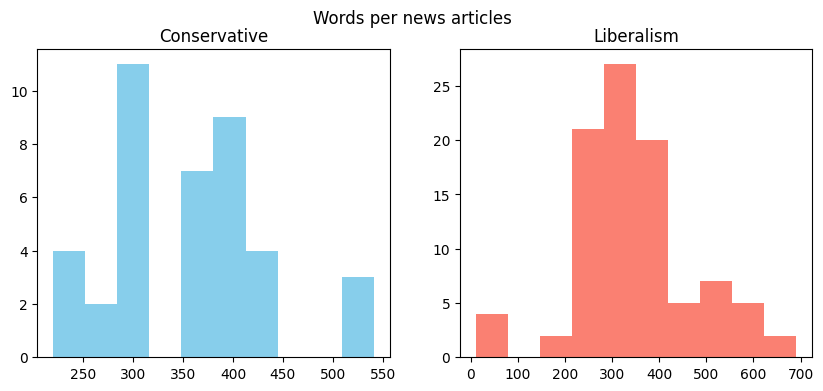

In [9]:
# plot word count
fig, (fact, fake) = plt.subplots(1, 2, figsize=(10, 4))

fact_words = df[df['liberalism_conservative'] == 1]['word_count']
fake_words = df[df['liberalism_conservative'] == 0]['word_count']

fact.hist(fact_words, color='skyblue')
fake.hist(fake_words, color='salmon')

fact.set_title('Conservative')
fake.set_title('Liberalism')

fig.suptitle('Words per news articles')
plt.show()

In [10]:
# add a column for the word count
df['text'] = df['title'] + ' ' + df['content']
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# calculate the median word count for each label
median_word_count_label_0 = df[df['coalition_opposition'] == 0]['word_count'].median()
median_word_count_label_1 = df[df['coalition_opposition'] == 1]['word_count'].median()

median_word_count_label_0, median_word_count_label_1

(351.0, 321.0)

In [11]:
# calculate the median word count for each label
mean_word_count_label_0 = df[df['coalition_opposition'] == 0]['word_count'].mean()
mean_word_count_label_1 = df[df['coalition_opposition'] == 1]['word_count'].mean()

mean_word_count_label_0, mean_word_count_label_1

(349.3018867924528, 340.25)

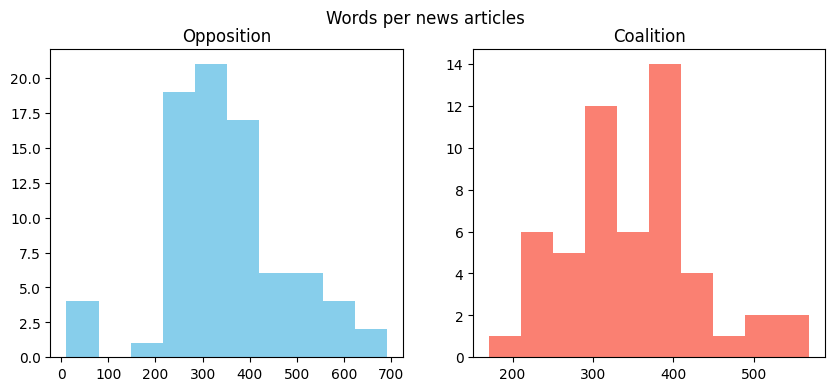

In [12]:
# plot word count
fig, (fact, fake) = plt.subplots(1, 2, figsize=(10, 4))

fact_words = df[df['coalition_opposition'] == 1]['word_count']
fake_words = df[df['coalition_opposition'] == 0]['word_count']

fact.hist(fact_words, color='skyblue')
fake.hist(fake_words, color='salmon')

fact.set_title('Opposition')
fake.set_title('Coalition')

fig.suptitle('Words per news articles')
plt.show()

# Data Preprocessing

## Stopword removal and lemmatization

In [13]:
# create sastrawi stopword
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()

# create sastrawi stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

In [14]:
# functions for cleaning, removing stopwords
def preprocess_text(text):
    text = str(text)

    # change text to lowercase
    text = text.lower()

    # change link with http/https patterns
    text = re.sub(r'http\S+', '', text)

    # remove hashtag and username
    text = re.sub(r'(@\w+|#\w+)', '', text)

    # remove character other than a-z and A-Z
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # replace new line '\n' with space
    text = re.sub(r'\n', ' ', text)

    # remove stopword with sastrawi library
    text = stopword.remove(text)

    # do stemming with sastrawi library
    text = stemmer.stem(text)

    # removing more than one space
    text = re.sub(r'\s{2,}', ' ', text)

    return text

In [15]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 132
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    133 non-null    object
 1   link                     133 non-null    object
 2   date                     133 non-null    object
 3   content                  133 non-null    object
 4   liberalism_conservative  133 non-null    int64 
 5   coalition_opposition     133 non-null    int64 
 6   text                     133 non-null    object
 7   word_count               133 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 9.4+ KB


In [16]:
# text preprocessing
df['text'] = df['text'].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/133 [00:00<?, ?it/s]

## Save text preprocessing result

In [ ]:
# save data preprocessing result
df.to_csv("dataset-talas-preprocess.csv", index=False)
df.to_json("dataset-talas-preprocess.json")

In [ ]:
files.download("dataset-talas-preprocess.csv")
files.download("dataset-talas-preprocess.json")

## Check median and mean word count after preprocessing

In [17]:
# add a column for the word count
df['text'] = df['title'] + ' ' + df['content']
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# calculate the median word count for each label
median_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].median()
median_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].median()

median_word_count_label_0, median_word_count_label_1

(324.0, 363.5)

In [18]:
# calculate the median word count for each label
mean_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].mean()
mean_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].mean()

mean_word_count_label_0, mean_word_count_label_1

(339.64516129032256, 353.65)

In [19]:
# add a column for the word count
df['text'] = df['title'] + ' ' + df['content']
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# calculate the median word count for each label
median_word_count_label_0 = df[df['coalition_opposition'] == 0]['word_count'].median()
median_word_count_label_1 = df[df['coalition_opposition'] == 1]['word_count'].median()

median_word_count_label_0, median_word_count_label_1

(351.0, 321.0)

In [20]:
# calculate the median word count for each label
mean_word_count_label_0 = df[df['coalition_opposition'] == 0]['word_count'].mean()
mean_word_count_label_1 = df[df['coalition_opposition'] == 1]['word_count'].mean()

mean_word_count_label_0, mean_word_count_label_1

(349.3018867924528, 340.25)

# Create Model Liberalism vs Conservative

## Split the datasets

In [21]:
# delete null row
df = df.dropna()

# separating features and labels
X = df['text'].values
y = df['liberalism_conservative'].values

In [22]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Model with ScikitLearn

Logistic Regression: 0.74
Support Vector Machine: 0.78
K-Nearest Neighbors: 0.67
Decision Tree: 0.56
Random Forest: 0.74
Gradient Boosting: 0.74


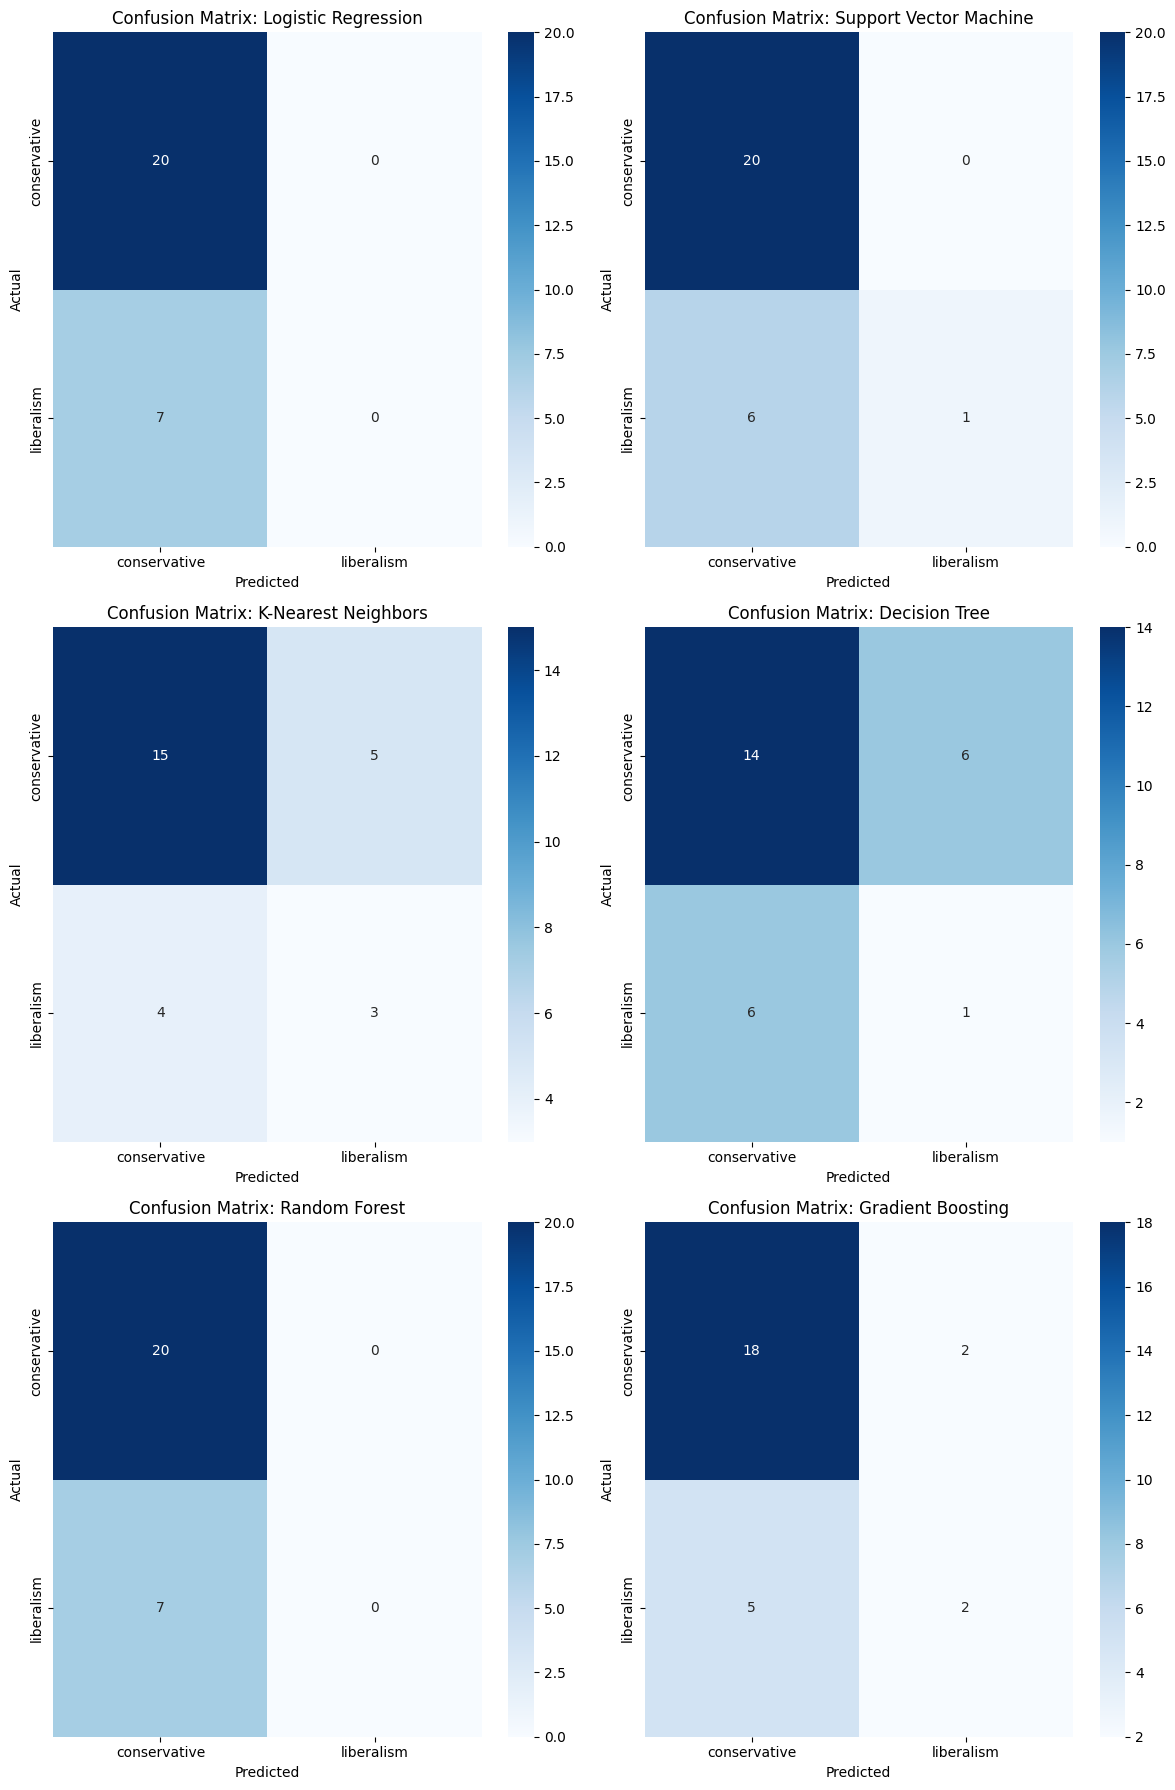

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# create a pipeline for each classifier
pipelines = {name: Pipeline([('tfidf', TfidfVectorizer()), ('clf', clf)]) for name, clf in classifiers.items()}

# train and evaluate classifiers
n_classifiers = len(pipelines)
n_cols = 2
n_rows = (n_classifiers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6*n_rows))
axes = axes.flatten()

for idx, (name, pipeline) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.2f}")

    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative', 'liberalism'], yticklabels=['conservative', 'liberalism'], ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix: {name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# hide any remaining empty subplots
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Create Tokenizer

In [24]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [25]:
# Create tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Converting text to numeric squences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding the squences
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Import library

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.layers import Flatten, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2, l1_l2

## Model A

In [27]:
# create model A
model_A = Sequential()
model_A.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_A.add(GlobalAveragePooling1D())
# model_A.add(Dense(24, activation='relu'))
# model_A.add(BatchNormalization())
# model_A.add(Dropout(0.3))
# model_A.add(Dense(8, activation='relu'))
model_A.add(Dense(6, activation='relu'))
# model_A.add(BatchNormalization())
# model_A.add(Dropout(0.3))
model_A.add(Dense(1, activation='sigmoid'))

model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160109 (625.43 KB)
Trainable params: 160109 (625.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# compile model
model_A.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model training
history = model_A.fit(padded_train_sequences, y_train,
                      epochs=100,
                      validation_data=(padded_test_sequences, y_test),
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 2s 204ms/step - loss: 0.6926 - accuracy: 0.5566 - val_loss: 0.6893 - val_accuracy: 0.7407
Epoch 2/100
4/4 [==============================] - 0s 38ms/step - loss: 0.6889 - accuracy: 0.6792 - val_loss: 0.6858 - val_accuracy: 0.7407
Epoch 3/100
4/4 [==============================] - 0s 67ms/step - loss: 0.6845 - accuracy: 0.6887 - val_loss: 0.6822 - val_accuracy: 0.7407
Epoch 4/100
4/4 [==============================] - 0s 44ms/step - loss: 0.6799 - accuracy: 0.6887 - val_loss: 0.6785 - val_accuracy: 0.7407
Epoch 5/100
4/4 [==============================] - 0s 51ms/step - loss: 0.6751 - accuracy: 0.6887 - val_loss: 0.6746 - val_accuracy: 0.7407
Epoch 6/100
4/4 [==============================] - 0s 51ms/step - loss: 0.6704 - accuracy: 0.6887 - val_loss: 0.6704 - val_accuracy: 0.7407
Epoch 7/100
4/4 [==============================] - 0s 53ms/step - loss: 0.6652 - accuracy: 0.6887 - val_loss: 0.6665 - val_accuracy: 0.7407
Epoch 8/100
4/4 [==

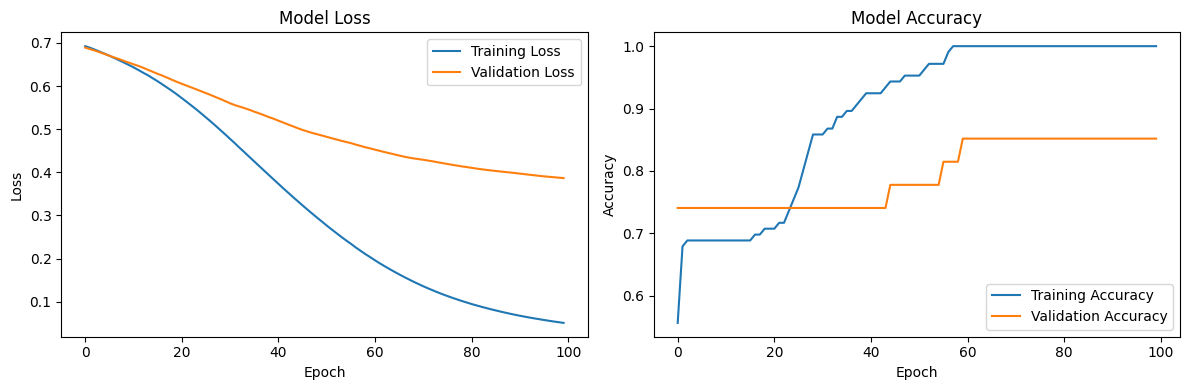

In [29]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

1/1 [==============================] - 0s 28ms/step - loss: 0.3867 - accuracy: 0.8519
Test Accuracy: 85.19%
1/1 [==============================] - 0s 109ms/step


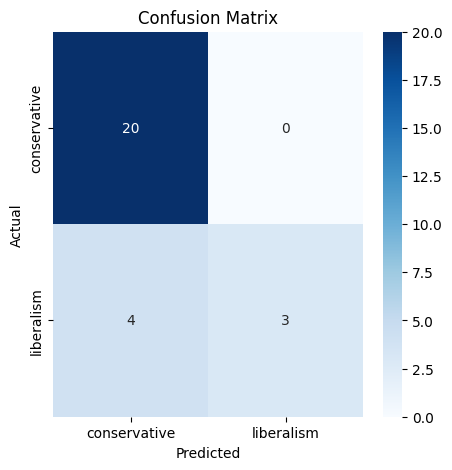

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
import pickle

# Evaluate the model
loss, accuracy = model_A.evaluate(padded_test_sequences, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_A.predict(padded_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative','liberalism'], yticklabels=['conservative','liberalism'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_A.save('liberalism_conservative_A.h5')

# Save the model with pickle format
with open('tokenizer_liberalism_conservative_A.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [31]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_A)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('liberalism_conservative_A.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Model has been saved as TensorFlow Lite format.


## Model B (LSTM)

In [32]:
# create model B
model_B = Sequential()
model_B.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model_B.add(LSTM(32, return_sequences=True))
# model_B.add(Dropout(0.3))
model_B.add(Bidirectional(LSTM(8)))
# model_B.add(Dropout(0.5))
# model_B.add(Dense(24, activation='relu'))
# model_B.add(BatchNormalization())
# model_B.add(Dropout(0.3))
# model_B.add(Dense(6, activation='relu'))
# model_B.add(Dropout(0.5))
model_B.add(Dense(1, activation='sigmoid'))

model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 16)                1600      
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161617 (631.32 KB)
Trainable params: 161617 (631.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# compile model
model_B.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model training
history = model_B.fit(padded_train_sequences, y_train,
                      epochs=100,
                      validation_data=(padded_test_sequences, y_test),
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 10s 427ms/step - loss: 0.6931 - accuracy: 0.5189 - val_loss: 0.6873 - val_accuracy: 0.7407
Epoch 2/100
4/4 [==============================] - 0s 75ms/step - loss: 0.6854 - accuracy: 0.6887 - val_loss: 0.6818 - val_accuracy: 0.7407
Epoch 3/100
4/4 [==============================] - 0s 71ms/step - loss: 0.6777 - accuracy: 0.6887 - val_loss: 0.6759 - val_accuracy: 0.7407
Epoch 4/100
4/4 [==============================] - 0s 81ms/step - loss: 0.6704 - accuracy: 0.6887 - val_loss: 0.6692 - val_accuracy: 0.7407
Epoch 5/100
4/4 [==============================] - 0s 71ms/step - loss: 0.6611 - accuracy: 0.6887 - val_loss: 0.6620 - val_accuracy: 0.7407
Epoch 6/100
4/4 [==============================] - 0s 78ms/step - loss: 0.6510 - accuracy: 0.6887 - val_loss: 0.6539 - val_accuracy: 0.7407
Epoch 7/100
4/4 [==============================] - 0s 81ms/step - loss: 0.6394 - accuracy: 0.6887 - val_loss: 0.6448 - val_accuracy: 0.7407
Epoch 8/100
4/4 [=

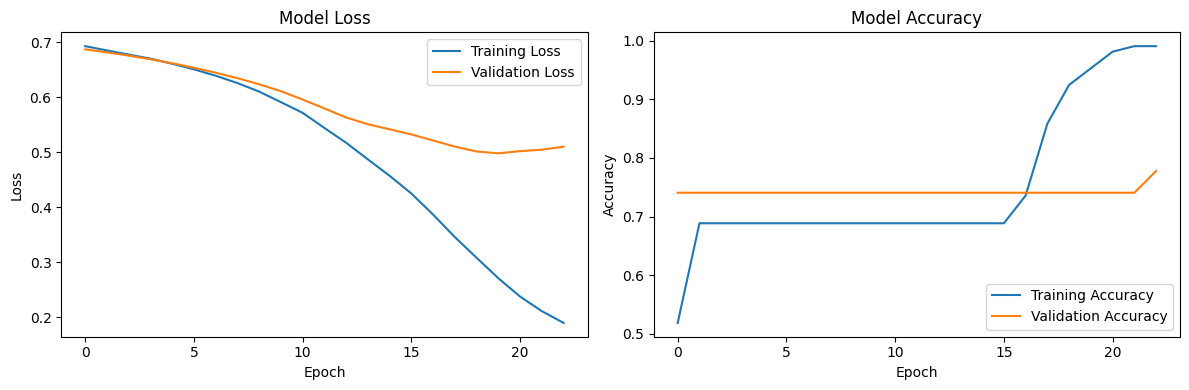

In [34]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

1/1 [==============================] - 0s 41ms/step - loss: 0.4981 - accuracy: 0.7407
Test Accuracy: 74.07%
1/1 [==============================] - 1s 876ms/step


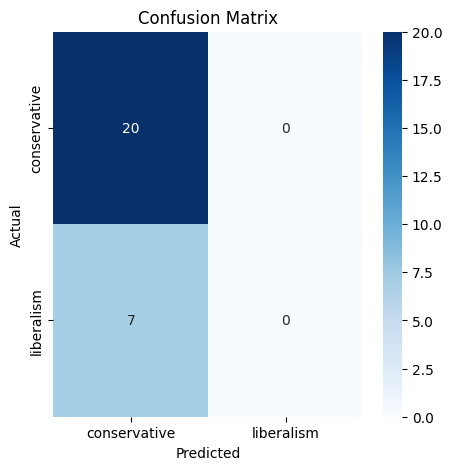

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
import pickle

# Evaluate the model
loss, accuracy = model_B.evaluate(padded_test_sequences, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_B.predict(padded_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative','liberalism'], yticklabels=['conservative','liberalism'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_B.save('liberalism_conservative_lstm.h5')

# Save the model with pickle format
with open('tokenizer_liberalism_conservative_lstm.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [36]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_B)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('liberalism_conservative_lstm.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Model has been saved as TensorFlow Lite format.


# Create Model Coalition vs Opposition

## Split the datasets

In [37]:
# delete null row
df = df.dropna()

# separating features and labels
X = df['text'].values
y = df['coalition_opposition'].values

In [38]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Model with ScikitLearn

Logistic Regression: 0.63
Support Vector Machine: 0.70
K-Nearest Neighbors: 0.67
Decision Tree: 0.67
Random Forest: 0.74
Gradient Boosting: 0.78


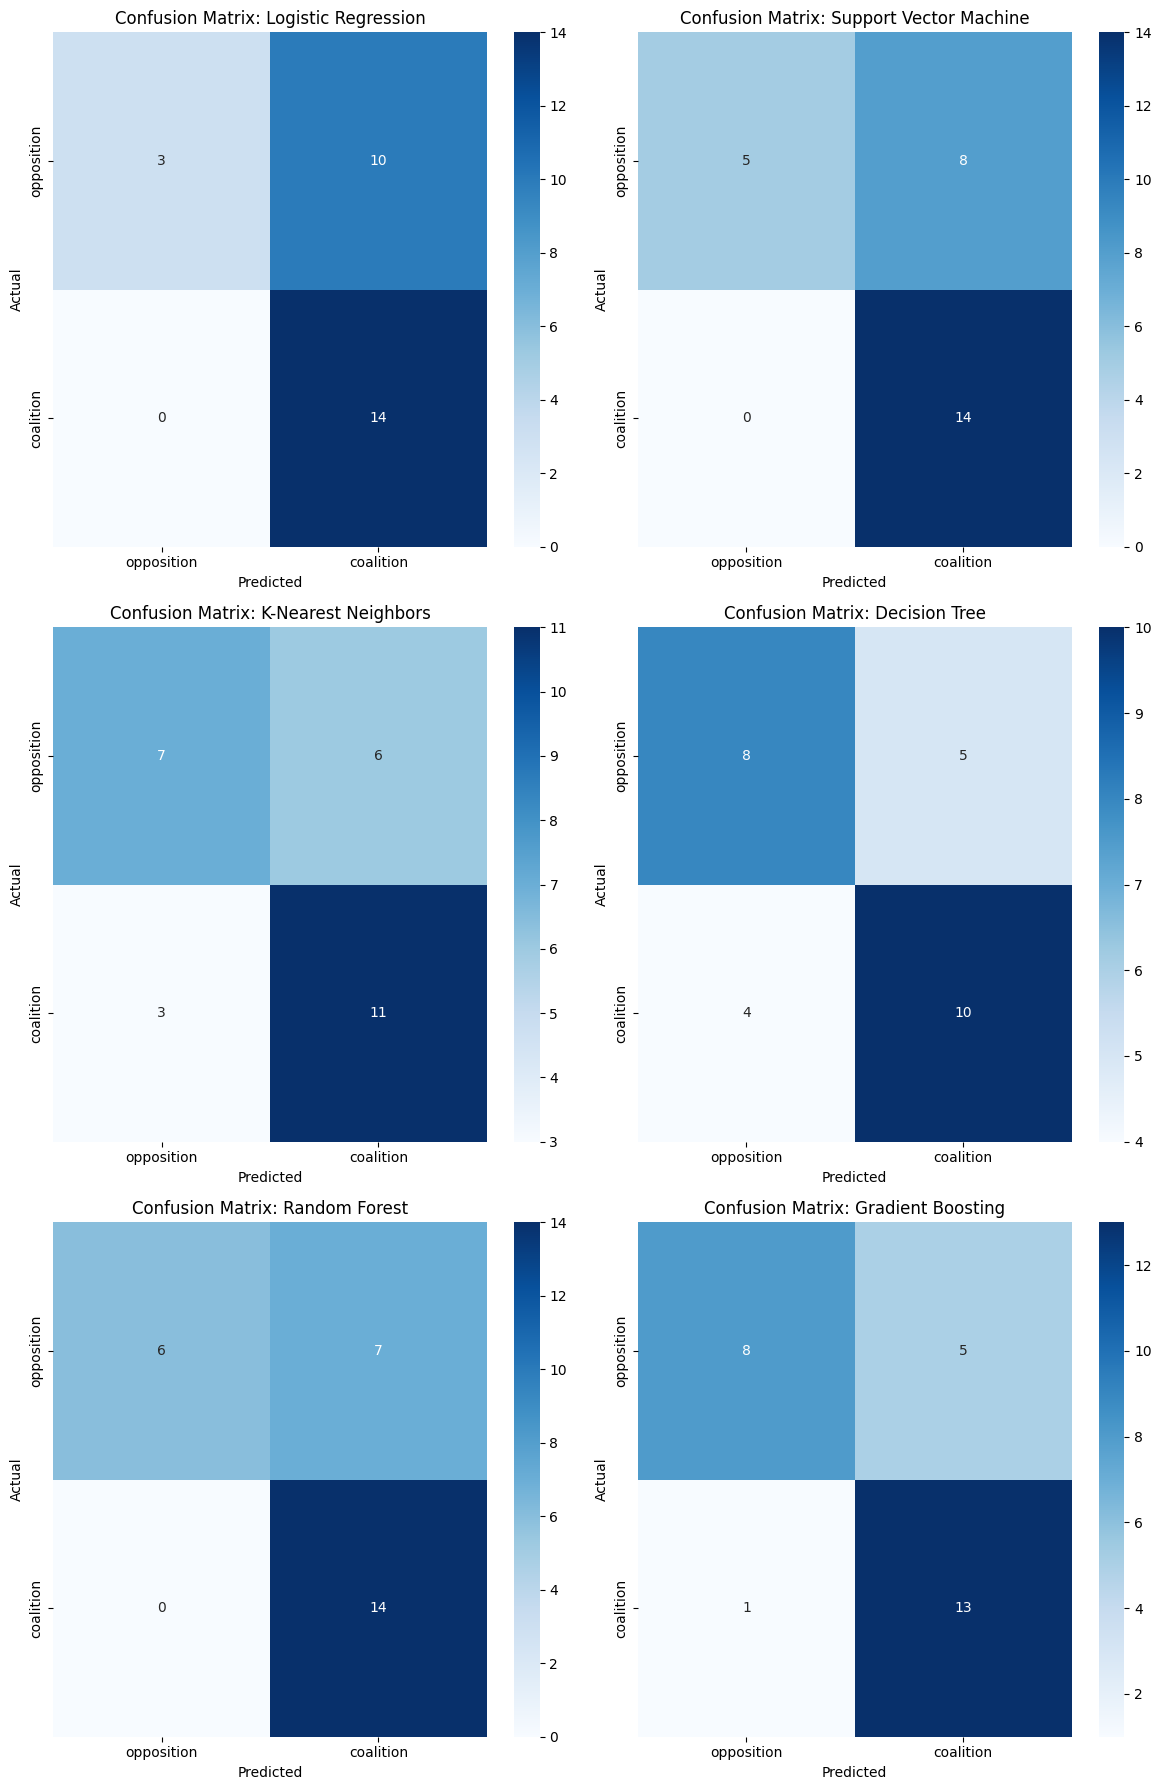

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# create a pipeline for each classifier
pipelines = {name: Pipeline([('tfidf', TfidfVectorizer()), ('clf', clf)]) for name, clf in classifiers.items()}

# train and evaluate classifiers
n_classifiers = len(pipelines)
n_cols = 2
n_rows = (n_classifiers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6*n_rows))
axes = axes.flatten()

for idx, (name, pipeline) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.2f}")

    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['opposition', 'coalition'], yticklabels=['opposition', 'coalition'], ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix: {name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# hide any remaining empty subplots
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Create Tokenizer

In [40]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [41]:
# Create tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Converting text to numeric squences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding the squences
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Import library

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.layers import Flatten, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2, l1_l2

## Model A

In [50]:
# create model A
model_A = Sequential()
model_A.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_A.add(GlobalAveragePooling1D())
# model_A.add(Dense(24, activation='relu'))
# model_A3.add(BatchNormalization())
# model_A.add(Dropout(0.3))
model_A.add(Dense(10, activation='relu'))
# model_A3.add(BatchNormalization())
# model_A.add(Dropout(0.5))
model_A.add(Dense(1, activation='sigmoid'))

model_A.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_4  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 160181 (625.71 KB)
Trainable params: 160181 (625.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# compile model
model_A.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model training
history = model_A.fit(padded_train_sequences, y_train,
                      epochs=100,
                      validation_data=(padded_test_sequences, y_test),
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 2s 122ms/step - loss: 0.6930 - accuracy: 0.5660 - val_loss: 0.6925 - val_accuracy: 0.5926
Epoch 2/100
4/4 [==============================] - 0s 32ms/step - loss: 0.6905 - accuracy: 0.6509 - val_loss: 0.6913 - val_accuracy: 0.4444
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6878 - accuracy: 0.6415 - val_loss: 0.6899 - val_accuracy: 0.4444
Epoch 4/100
4/4 [==============================] - 0s 32ms/step - loss: 0.6839 - accuracy: 0.6509 - val_loss: 0.6889 - val_accuracy: 0.5556
Epoch 5/100
4/4 [==============================] - 0s 32ms/step - loss: 0.6799 - accuracy: 0.6698 - val_loss: 0.6879 - val_accuracy: 0.5185
Epoch 6/100
4/4 [==============================] - 0s 34ms/step - loss: 0.6756 - accuracy: 0.6792 - val_loss: 0.6867 - val_accuracy: 0.5185
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 0.6709 - accuracy: 0.6981 - val_loss: 0.6853 - val_accuracy: 0.5185
Epoch 8/100
4/4 [==

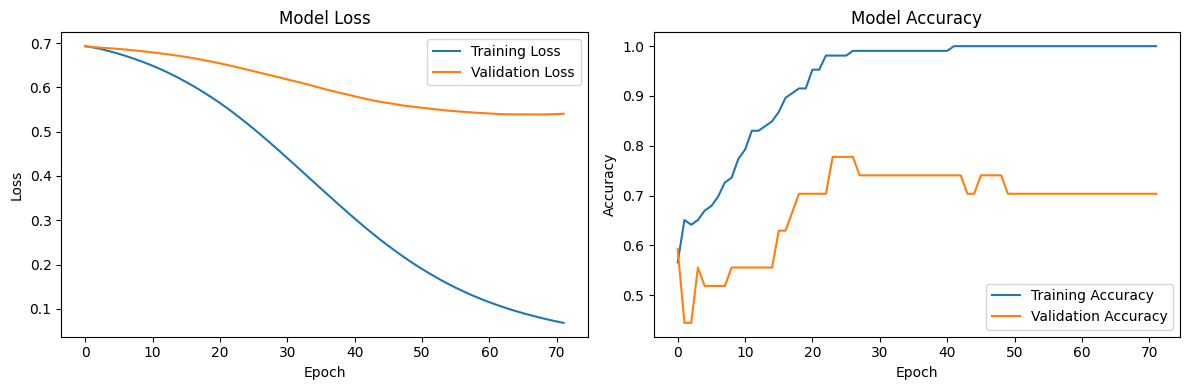

In [52]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

1/1 [==============================] - 0s 33ms/step - loss: 0.5388 - accuracy: 0.7037
Test Accuracy: 70.37%
1/1 [==============================] - 0s 71ms/step


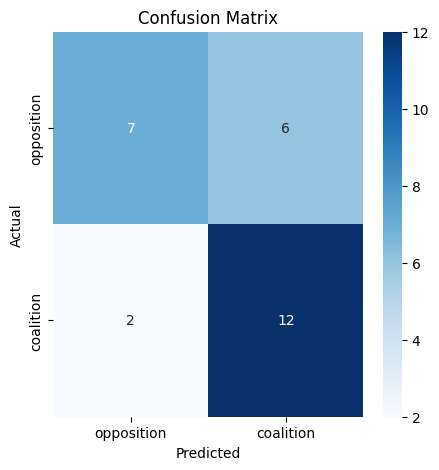

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
import pickle

# Evaluate the model
loss, accuracy = model_A.evaluate(padded_test_sequences, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_A.predict(padded_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['opposition', 'coalition'], yticklabels=['opposition', 'coalition'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_A.save('coalition_opposition_A.h5')

# Save the model with pickle format
with open('tokenizer_coalition_opposition_A.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [54]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_A)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('coalition_opposition_A.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Model has been saved as TensorFlow Lite format.


## Model B (LSTM)

In [85]:
# create model B
model_B = Sequential()
model_B.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model_B.add(LSTM(32, return_sequences=True))
# model_B.add(Dropout(0.3))
model_B.add(Bidirectional(LSTM(16)))
# model_B.add(Dropout(0.3))
# model_B.add(Dense(24, activation='relu'))
# model_B.add(BatchNormalization())
# model_B.add(Dropout(0.3))
# model_B.add(Dense(8, activation='relu'))
# model_B.add(Dropout(0.5))
model_B.add(Dense(1, activation='sigmoid'))

model_B.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 100, 16)           160000    
                                                                 
 bidirectional_10 (Bidirect  (None, 32)                4224      
 ional)                                                          
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 164257 (641.63 KB)
Trainable params: 164257 (641.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
# compile model
model_B.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model training
history = model_B.fit(padded_train_sequences, y_train,
                      epochs=100,
                      validation_data=(padded_test_sequences, y_test),
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 8s 470ms/step - loss: 0.6924 - accuracy: 0.5094 - val_loss: 0.6917 - val_accuracy: 0.5556
Epoch 2/100
4/4 [==============================] - 0s 86ms/step - loss: 0.6859 - accuracy: 0.6321 - val_loss: 0.6910 - val_accuracy: 0.5185
Epoch 3/100
4/4 [==============================] - 0s 85ms/step - loss: 0.6800 - accuracy: 0.6226 - val_loss: 0.6900 - val_accuracy: 0.5185
Epoch 4/100
4/4 [==============================] - 0s 88ms/step - loss: 0.6721 - accuracy: 0.6226 - val_loss: 0.6890 - val_accuracy: 0.5185
Epoch 5/100
4/4 [==============================] - 0s 79ms/step - loss: 0.6621 - accuracy: 0.6226 - val_loss: 0.6879 - val_accuracy: 0.5185
Epoch 6/100
4/4 [==============================] - 0s 110ms/step - loss: 0.6473 - accuracy: 0.6226 - val_loss: 0.6870 - val_accuracy: 0.5185
Epoch 7/100
4/4 [==============================] - 1s 141ms/step - loss: 0.6246 - accuracy: 0.6226 - val_loss: 0.6884 - val_accuracy: 0.5185
Epoch 8/100
4/4 [

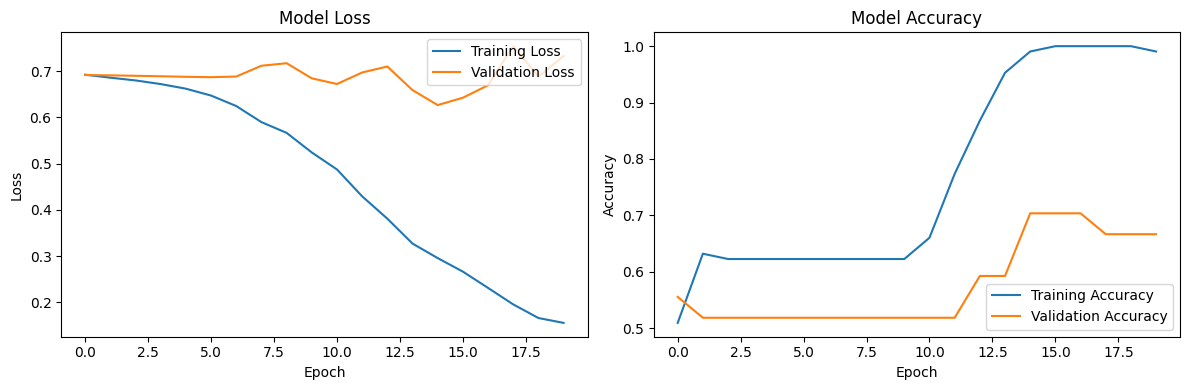

In [87]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

1/1 [==============================] - 0s 42ms/step - loss: 0.6267 - accuracy: 0.7037
Test Accuracy: 70.37%
1/1 [==============================] - 1s 935ms/step


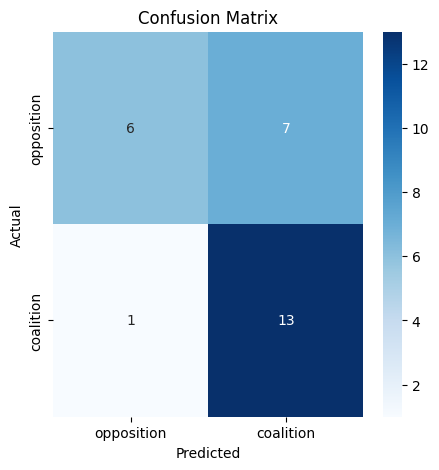

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
import pickle

# Evaluate the model
loss, accuracy = model_B.evaluate(padded_test_sequences, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_B.predict(padded_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['opposition', 'coalition'], yticklabels=['opposition', 'coalition'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_B.save('coalition_opposition_lstm.h5')

# Save the model with pickle format
with open('tokenizer_coalition_opposition_lstm.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [91]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_B)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('coalition_opposition_lstm.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Model has been saved as TensorFlow Lite format.


# Download model

In [ ]:
files.download("liberalism_conservative_A.tflite")
files.download("liberalism_conservative_A.h5")
files.download("liberalism_conservative_lstm.tflite")
files.download("liberalism_conservative_lstm.h5")
files.download("coalition_opposition_A.tflite")
files.download("coalition_opposition_A.h5")
files.download("coalition_opposition_lstm.tflite")
files.download("coalition_opposition_lstm.h5")
files.download("tokenizer_liberalism_conservative_A.pkl")
files.download("tokenizer_liberalism_conservative_lstm.pkl")
files.download("tokenizer_coalition_opposition_A.pkl")
files.download("tokenizer_coalition_opposition_lstm.pkl")